# Imports and Global Variables

In [20]:
import pandas as pd
import numpy as np
import plotly.express as plt
import nltk, re, json
from wordcloud import WordCloud, STOPWORDS


stopwords = STOPWORDS.union(nltk.corpus.stopwords.words("english"))

code = {(True, False): 'Human but Not Verified',
        (True, True): 'Human and Verified',
        (False, False): 'Not Human and Not Verified',
        (False, True): 'Verified but Not Human'}

# Creating Users Dataframe

In [21]:
users = pd.read_csv('parler_userData.csv')
users

,Name,Score,Id,Bio,Joined,Username,Interactions,Human,Verified
0,Sarah Girl,1200,da0f9535a8b6496abc14010aaf9be246,NaN,20201127230523,PrincessofGod20,258,False,False
1,Millstone-Diaries,3200,ac38ce34a28d403d90fd1dd93bbe32b6,An Uncompromising Christian and Believer in th...,20190529011653,IMKane,258,False,False
2,Garrett Karls MAGA,325,7e544918da634f368dd0c13a9116e527,"Conservative, Trump supporter. and a father of...",20201101154323,GarrettKarls,387,True,False
3,Proud Boys,544000,976d38b4a1a54b33888ed97ca88ca03a,DISAVOWED BOYS - POOR BOYS - Western chauvinis...,20190530151237,TheProudBoys,3,False,True
4,Rudy G,490000,ac3d687553924ca48daf698cefb7a73d,https://rudygiulianics.com/,20190508004705,RudyG,263,False,True
...,...,...,...,...,...,...,...,...,...
22321,Parkerjnj,993,ff6fc0d66dea4654bb98b836f1e878a7,NaN,20200529172205,Parkerjnj,258,False,False
22322,Tess,2900,6eb1af6056274d11938b33c63f7aadc5,"I am a daughter of the living God. ""The LORD h...",20201120223402,tesslove,258,False,False
22323,Rep. Chris Stewart,17,e20816f15cf84bba8aced9ddda910eee,Utah's 2nd District Congressman. Former Air Fo...,20201119151156,Repchrisstewart,258,False,False
22324,Rob K,169,501e667129be47369d7cd6833d9d8c1b,My Twitter handle is the same as my Parler han...,20201111032420,EastCoast30Cal,258,False,False


# Creating Posts Dataframe

In [22]:
posts = pd.read_csv('parler_postsData.csv')
posts

,Impressions,Id,Upvotes,At,Comments,Reposts,CreatedAt,Body,Creator
0,1200,f0a22bc185a8410b97dd8e585a9d1675,13,{},0,2,20210107152010,JACK MA DISAPPEARED SINCE NOVEMB AFTER CRITICI...,b12df9cacba44ff08837b823ba906f6b
1,585,cb32e16712cf4a7487df85d4ec0cf501,3,{},0,2,20210107135304,#MAGA2020 #MAGA #ELECTIONINTEGRITY #TRUMP2020 ...,8290766df6a5425faa789461eb5051d0
2,575,95e3375166e34ba78bcd923f2ad4a3e2,7,{},0,1,20210107133202,#MAGA2020 #MAGA #ELECTIONINTEGRITY #TRUMP2020 ...,8290766df6a5425faa789461eb5051d0
3,573,c13cde4dd090430c8f767cab2f5a8e9f,6,{},0,0,20210107132935,#MAGA2020 #MAGA #ELECTIONINTEGRITY #TRUMP2020 ...,8290766df6a5425faa789461eb5051d0
4,783,a227038bb5f84e559d411826af70f465,6,{},0,3,20210107122729,#MAGA2020 #MAGA #ELECTIONINTEGRITY #TRUMP2020 ...,8290766df6a5425faa789461eb5051d0
...,...,...,...,...,...,...,...,...,...
101940,209,5d57d41ead594f51b6df788b681ded5f,0,{},0,0,20201127164237,The dozen belated disclosures that turned the ...,804e16c75cc74b309cd325f7f8cc96ae
101941,2200,50d7e24154cd46149486baad0dd9148a,22,{},1,12,20201127163307,"To put this in perspective, a 70% turnout woul...",02bc6e6a7cb349c2ac4a7bb9d4bdd12c
101942,119,1ee8b9bb259a4306851d608f51571a62,1,{},0,0,20201127162850,#trump #killary #coup #clintoncrimefamily #joe...,2dd8e283205346889dab4e884f81c0c5
101943,313,97cf2a94a13c4d63bbea5824544928c1,4,{},1,1,20201127161910,The Plot Against the President 2020 Documentar...,8b3b4ad742024b9a8e878fbdb3402bf3


In [23]:
# finding ids of top 10 users with most content generated from the posts dataframe
top10_ids = posts['Creator'].value_counts().head(n = 10)

# using above 10 ids to extract the info of the top 10 users
mask = []
for id in users['Id']:
    mask.append(id in list(top10_ids.index))
top10_users = users.loc[mask]

# adding Content_Percentage and Cumulative_percentage columns to the top 10 users dataframe
count = []
for id in top10_users['Id']:
    count.append(top10_ids[id] / posts.shape[0])
top10_users = top10_users.assign(Content_Percentage = count)
top10_users.sort_values(['Content_Percentage'], ascending = False, inplace = True)
top10_users['Cumulative_Percentage'] = top10_users['Content_Percentage'].cumsum()
top10_users['Content_Percentage'] = top10_users['Content_Percentage'] * 100
top10_users['Cumulative_Percentage'] = top10_users['Cumulative_Percentage'] * 100

# adding Human_Or_Verified column to differentiate among the 4 types
verified_human = [];
for i in top10_users.index:
    verified_human.append(code[(top10_users.loc[i, 'Human'], top10_users.loc[i, 'Verified'])])
top10_users = top10_users.assign(Human_Or_Verified = verified_human)

# displaying the Cumulative_Percentage, Bar plot and Dataframe of the top 10 users
print('Total Percentage of Content generated by the top 10 users is', list(top10_users['Cumulative_Percentage'])[-1])
order = {'Username': list(top10_users['Username'])}
fig = plt.bar(top10_users, x = 'Username',
              y = 'Content_Percentage',
              color = 'Human_Or_Verified',
              category_orders = order,
              title = 'Top 10 Users with most content generated',
              height = 700)
fig.show()
top10_users.set_index('Username', inplace = True)
top10_users[['Human', 'Verified', 'Content_Percentage', 'Cumulative_Percentage']]

Total Percentage of Content generated by the top 10 users is 16.606013046250432


,Human,Verified,Content_Percentage,Cumulative_Percentage
Username,,,,
Patriots4US,True,False,6.199421,6.199421
TheRealWakeUpMfers,False,False,2.530776,8.730198
GameOver,False,False,1.379175,10.109373
Billyboy428,True,False,1.083918,11.193290
marylandcrabbing,True,False,0.975036,12.168326
2ndPro1776,True,False,0.947570,13.115896
LucidKeK,True,False,0.904409,14.020305
UnravelTheWeb,False,False,0.899505,14.919810
GrinPioneer,True,False,0.856344,15.776154


In [24]:
# extracting top 10 users with most number of upvotes
sorted_users = users.sort_values(['Score'], ascending = False);
top10_users = sorted_users.head(n = 10);

# adding Human_Or_Verified column to differentiate among the 4 types
verified_human = [];
for i in top10_users.index:
    verified_human.append(code[(top10_users.loc[i, 'Human'], top10_users.loc[i, 'Verified'])])
top10_users = top10_users.assign(Human_Or_Verified = verified_human) 

# displaying the Bar plot and Dataframe of the top 10 users
order = {'Username': list(top10_users['Username'])}
fig = plt.bar(top10_users, x = 'Username',
              y = 'Score',
              color = 'Human_Or_Verified',
              category_orders = order,
              title = 'Top 10 Users with most number of upvotes',
              height = 700)
fig.show()
top10_users.set_index('Username', inplace = True)
top10_users[['Human', 'Verified', 'Score']]

,Human,Verified,Score
Username,,,
Dbongino,False,True,6000000
Marklevinshow,False,True,5800000
SeanHannity,True,True,5700000
linwood,False,True,5200000
DineshDSouza,False,True,4500000
TommyRobinson,False,True,4000000
epochtimes,True,False,3500000
WeLoveTrump,True,False,2000000
Redcode71,True,False,2000000


In [25]:
# extracting top 10 users with most number of interactions
sorted_users = users.sort_values(['Interactions'], ascending = False);
top10_users = sorted_users.head(n = 10);

# adding Human_Or_Verified column to differentiate among the 4 types
verified_human = [];
for i in top10_users.index:
    verified_human.append(code[(top10_users.loc[i, 'Human'], top10_users.loc[i, 'Verified'])])
top10_users = top10_users.assign(Human_Or_Verified = verified_human)  

# displaying Bar plot and Dataframe of the top 10 users
order = {'Username': list(top10_users['Username'])}
fig = plt.bar(top10_users, x = 'Username',
              y = 'Interactions',
              color = 'Human_Or_Verified',
              category_orders = order,
              title = 'Top 10 Users with most number of interactions',
              height = 700)
fig.show()
top10_users.set_index('Username', inplace = True)
q2_ii_df = top10_users
top10_users[['Human', 'Verified', 'Interactions']]

,Human,Verified,Interactions
Username,,,
Marklevinshow,False,True,8478
AmyPeikoff,True,False,6503
parler,False,True,6407
parlerdev,False,True,6403
oathkeep3r,True,False,6275
Jared,False,True,6247
OmegaGeek,True,False,4131
Jeffreywernick,True,False,2307
John,True,True,2151


In [26]:
# finding top 10 ids with most number of mentions from the posts dataframe 
mentions = {}
for at in posts.index:
    st = posts.loc[at, 'At']
    st = st.replace("\'", "\"")
    m = json.loads(st);
    for id in m.values():
        if id not in mentions:
            mentions[id] = 1
        else:
            mentions[id] += 1
d = {'Id': list(mentions.keys()), 'Number_Of_Mentions': list(mentions.values())}
mentions_df = pd.DataFrame(d)
mentions_df.sort_values(['Number_Of_Mentions'], inplace = True, ascending = False)
top10_ids = mentions_df.head(n = 10)
top10_ids.set_index('Id', inplace = True)

# using the above 10 ids to extract info of the top 10 users
mask = []
for id in users['Id']:
    mask.append(id in list(top10_ids.index))
top10_users = users.loc[mask]

# adding Number_Of_Mentions column to the dataframe of top 10 users
count = []
for i in top10_users['Id']:
    count.append(top10_ids.loc[i, 'Number_Of_Mentions'])
top10_users = top10_users.assign(Number_Of_Mentions = count)
top10_users.sort_values(['Number_Of_Mentions'], ascending = False, inplace = True)

# adding Human_Or_Verified column to differentiate among the 4 types 
verified_human = [];
for i in top10_users.index:
    verified_human.append(code[(top10_users.loc[i, 'Human'], top10_users.loc[i, 'Verified'])])
top10_users = top10_users.assign(Human_Or_Verified = verified_human)

# displaying Bar plot and Dataframe of the top 10 users
order = {'Username': list(top10_users['Username'])}
fig = plt.bar(top10_users, x = 'Username',
              y = 'Number_Of_Mentions',
              color = 'Human_Or_Verified',
              category_orders = order,
              title = 'Top 10 Users with most number of mentions',
              height = 700)
fig.show()
top10_users.set_index('Username', inplace = True)
top10_users[['Human', 'Verified', 'Number_Of_Mentions']]

,Human,Verified,Number_Of_Mentions
Username,,,
TeamTrump,False,True,3363
linwood,False,True,2802
SeanHannity,True,True,2185
Marklevinshow,False,True,2139
GenFlynn,False,True,1805
TuckerCarlson,False,True,1786
RudyG,False,True,1507
blocked,False,False,1130
DanScavino45,False,True,1103



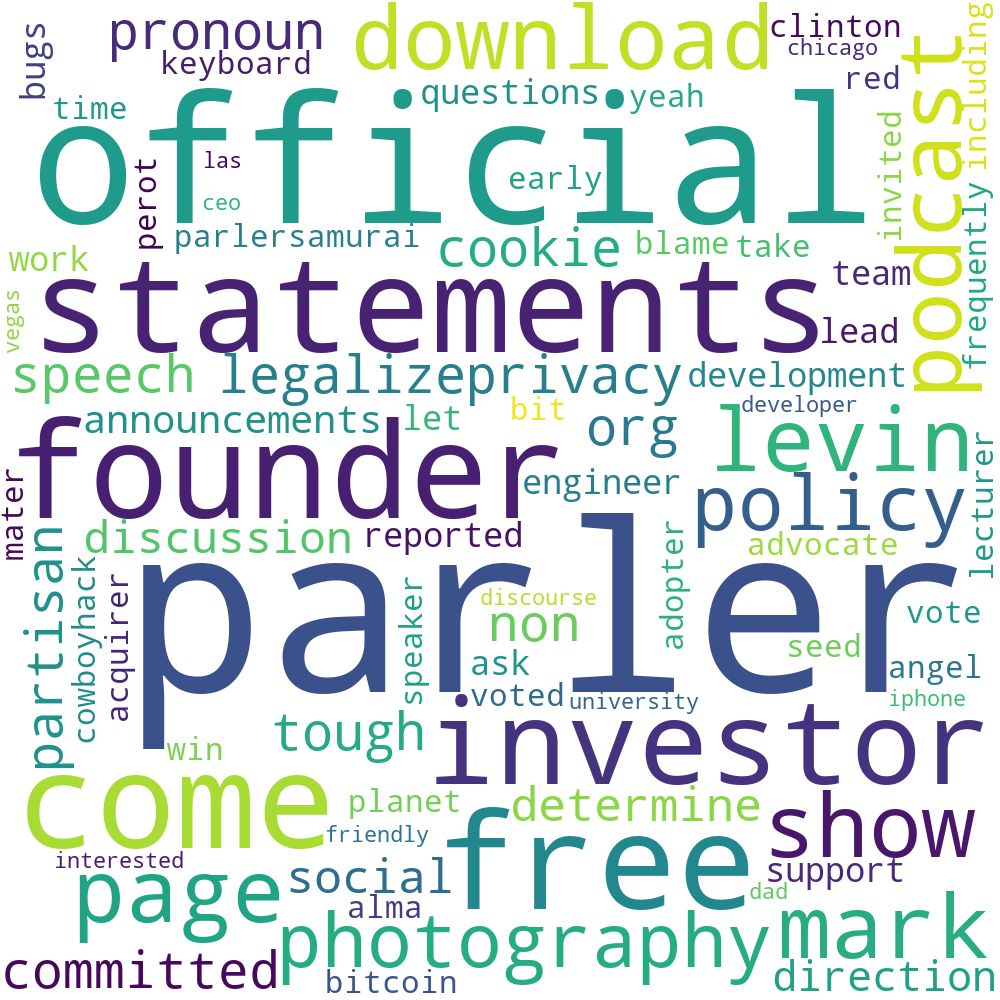

In [27]:
# extracting meaningful words from the bio of top 10 users
text_data = []
df = q2_ii_df
df_bio = df['Bio'].fillna('')
for text in list(df_bio):
    text = text.replace("\\n", "")
    for word in text.split():
        reg_url = 'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+'
        url = re.findall(reg_url, word)
        reg_hashtag = "^#[a-zA-Z0-9_]+"
        hashtag = re.findall(reg_hashtag, word)
        reg_mention = "^@[a-zA-Z0-9_]+"
        mention = re.findall(reg_mention, word)
        if len(word) > 2 and len(url) == 0 and len(hashtag) == 0 and len(mention) == 0:
            text_data.append(word.lower())
cleaned_text = " ".join(text_data)
clean_words = []
for word in nltk.tokenize.word_tokenize(cleaned_text):
    if (len(word) > 2):
        clean_words.append(word)
        
# creating string object 'text' which contains all the words obtained above separated with space
text = " ".join(clean_words)

# using the above string object to create a WordCloud
wc = WordCloud(width = 1000,
               height = 1000,
               stopwords = stopwords,
               collocations = False,
               background_color = 'white').generate(text)

# displaying the obtained wordcloud
fig = plt.imshow(wc)
fig.update_layout(height = 700)
fig.update_xaxes(showticklabels = False)
fig.update_yaxes(showticklabels = False)
fig.show()


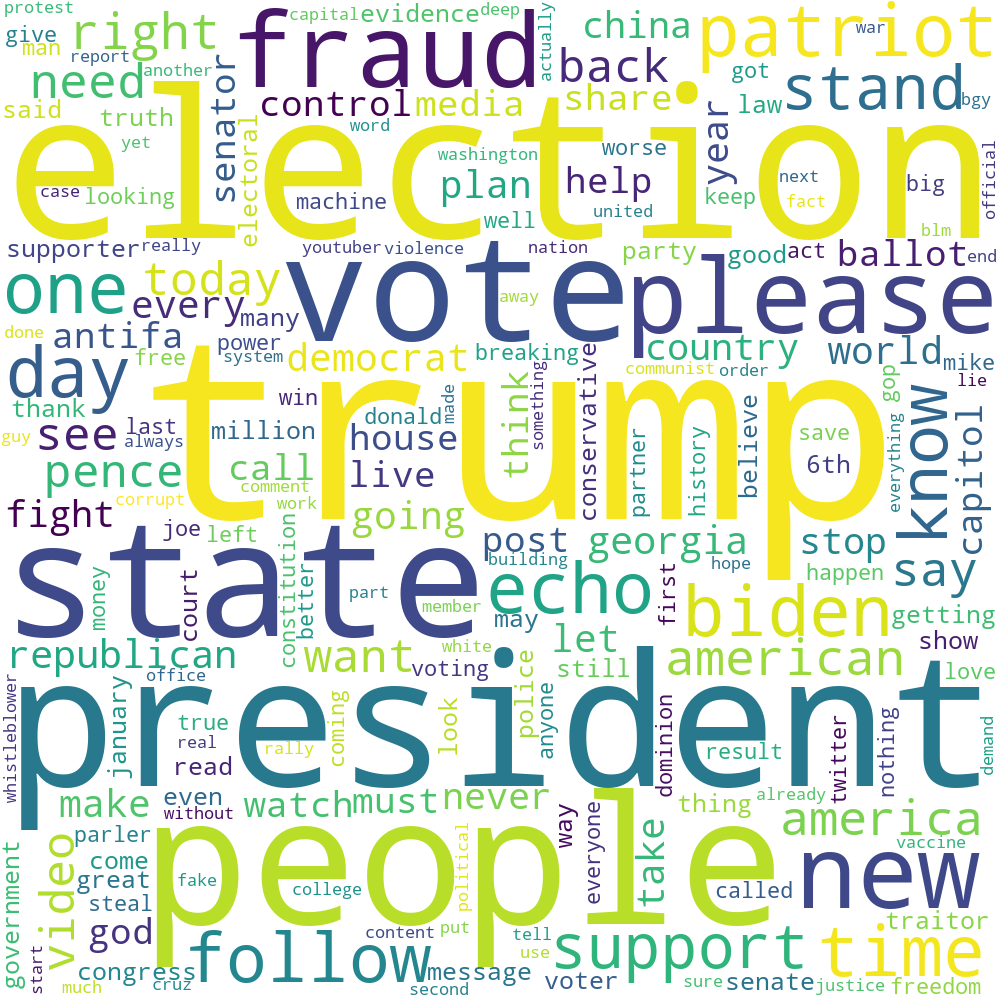

In [28]:
# extracting meaningful words from the content of each post
text_data = []
body_col = posts['Body'].fillna("")
for content in list(body_col):
    content = content.replace("\\n", " ")
    for word in content.split():
        reg_url = 'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+'
        url = re.findall(reg_url, word)
        reg_hashtag = "^#[a-zA-Z0-9_]+"
        hashtag = re.findall(reg_hashtag, word)
        reg_mention = "^@[a-zA-Z0-9_]+"
        mention = re.findall(reg_mention, word)
        if len(word) > 2 and len(url) == 0 and len(hashtag) == 0 and len(mention) == 0:
            text_data.append(word.lower())
cleaned_text = " ".join(text_data)
clean_words = []
for word in nltk.tokenize.word_tokenize(cleaned_text):
    if (len(word) > 2 and word.isalnum()):
        clean_words.append(word)

# creating string object 'text' which contains all the words obtained above separated with space
text = " ".join(clean_words)

# using the above string object to create a WordCloud
wc = WordCloud(width = 1000,
               height = 1000,
               stopwords = stopwords,
               collocations = False,
               background_color = 'white').generate(text)

# displaying the obtained wordcloud
fig = plt.imshow(wc)
fig.update_layout(height = 700)
fig.update_xaxes(showticklabels = False)
fig.update_yaxes(showticklabels = False)
fig.show()

In [29]:
# extracting top 10 meaningful words from the words we obtained while creating the above wordcloud
word_count = {}
for word in clean_words:
    if word not in stopwords:
        if (word not in word_count):
            word_count[word] = 1
        else:
            word_count[word] += 1
count_df = pd.DataFrame({'Word': list(word_count.keys()), 'Number_Of_Occurrences': list(word_count.values())})
count_df.sort_values(['Number_Of_Occurrences'], inplace = True, ascending = False)
top10_words = count_df.head(n = 10)

# displaying Bar plot and dataframe of the top 10 words
fig = plt.bar(top10_words, x = 'Word',
              y = 'Number_Of_Occurrences',
              title = 'Top 10 most occurring words',
              height = 700)
fig.show()
top10_words.set_index('Word', inplace = True)
top10_words

,Number_Of_Occurrences
Word,
trump,13152
election,7641
president,6922
people,6680
please,4384
fraud,4277
echo,3918
biden,3796
one,3590


In [30]:
# finding top 10 hashtags from the content of the posts
body_col = posts['Body'].fillna('')
hashtag_count = {}
for content in list(body_col):
    content = content.replace("\\n", " ")
    for word in content.split():
        reg_hashtag = "^#[a-zA-Z0-9_]+"
        hashtag = re.findall(reg_hashtag, word)
        for tag in hashtag:
            tag = tag.lower()
            if (tag not in hashtag_count):
                hashtag_count[tag] = 1
            else:
                hashtag_count[tag] += 1
count_df = pd.DataFrame({'Hashtag': list(hashtag_count.keys()), 'Number_Of_Occurrences': list(hashtag_count.values())})
count_df.sort_values(['Number_Of_Occurrences'], inplace = True, ascending = False)
top10_hashtags = count_df.head(n = 10)

# displaying Bar plot and dataframe of the top 10 hashtags
fig = plt.bar(top10_hashtags, x = 'Hashtag',
              y = 'Number_Of_Occurrences',
              title = 'Top 10 most occurring hashtags',
              height = 700)
fig.show()
top10_hashtags.set_index('Hashtag', inplace = True)
top10_hashtags

,Number_Of_Occurrences
Hashtag,
#stopthesteal,77404
#maga,58705
#trump2020,51639
#trump,46938
#voterfraud,40556
#donaldtrump,40265
#election2020,29599
#electionfraud,29434
#parler,29276


In [ ]:
# Calculating number of posts and total posts length for each hashtag present in the posts
body_col = posts['Body'].fillna('')
num_posts = {}
posts_length = {}
for content in list(body_col):
    content = content.replace("\\n", " ")
    count = 0
    hashtags = []
    clean_words = []
    for word in content.split():
        reg_url = 'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+'
        url = re.findall(reg_url, word)
        reg_hashtag = "^#[a-zA-Z0-9_]+"
        hashtag = re.findall(reg_hashtag, word)
        for t in hashtag:
            hashtags.append(t.lower())
        reg_mention = "^@[a-zA-Z0-9_]+"
        mention = re.findall(reg_mention, word)
        if len(url) == 0 and len(hashtag) == 0 and len(mention) == 0:
            clean_words.append(word.lower())
    cleaned_text = " ".join(clean_words)
    for word in nltk.tokenize.word_tokenize(cleaned_text):
        if (word.isalnum()):
            count += 1
    for tag in hashtags:
        if tag not in num_posts:
            num_posts[tag] = 1
        else:
            num_posts[tag] += 1
        if tag not in posts_length:
            posts_length[tag] = count
        else:
            posts_length[tag] += count

# using the total posts length and number of posts to calculate the average post length for each hashtag
avg_posts_length = {}
for key in posts_length.keys():
    avg_posts_length[key] = int(posts_length[key] / num_posts[key])

# extracting the top 10 hashtags with maximum average post length
count_df = pd.DataFrame({'Hashtag': list(avg_posts_length.keys()), 'Average_Post_Length': list(avg_posts_length.values())})
count_df.sort_values(['Average_Post_Length'], inplace = True, ascending = False)
top10_hashtags = count_df.head(n = 10)

# displaying Bar plot and dataframe of the top 10 hashtags
fig = plt.bar(top10_hashtags, x = 'Hashtag',
              y = 'Average_Post_Length',
              title = 'Top 10 hashtags with longest average post length',
              height = 700)
fig.show()
top10_hashtags.set_index('Hashtag', inplace = True)
top10_hashtags

In [ ]:
# calculating the number of posts generated at each hour interval and storing them in hourly_posts_df dataframe
hourly_posts = (posts.assign(Created_At_Hour = lambda x: (x['CreatedAt'] - (x['CreatedAt']%10000)) // 10000))['Created_At_Hour'].value_counts()
hourly_posts_df = pd.DataFrame({'DateTime': list(hourly_posts.index), 'Number_Of_Posts': list(hourly_posts.values)})
hourly_posts_df.sort_values(['DateTime'], inplace = True)
hourly_posts_df['DateTime'] = pd.to_datetime(hourly_posts_df['DateTime'], format = '%Y%m%d%H')

# displaying the time-series graph using plotly
fig = plt.line(hourly_posts_df,
               x = 'DateTime',
               y = 'Number_Of_Posts',
               title = 'Number of Posts Generated Hourly',
               height = 700)
fig.show()
hourly_posts_df.set_index('DateTime', inplace = True)
hourly_posts_df

In [ ]:
# calculating the number of user accounts created on each day interval and storing them in daily_users_df dataframe
daily_users = (users.assign(Joined_On_Day = lambda x: (x['Joined'] - (x['Joined']%1000000)) // 1000000))['Joined_On_Day'].value_counts()
daily_users_df = pd.DataFrame({'DateTime': list(daily_users.index), 'Number_Of_Users': list(daily_users.values)})
daily_users_df.sort_values(['DateTime'], inplace = True)
daily_users_df['DateTime'] = pd.to_datetime(daily_users_df['DateTime'], format = '%Y%m%d')

# displaying the time-series graph using plotly
fig = plt.line(daily_users_df,
               x = 'DateTime',
               y = 'Number_Of_Users',
               title = 'Number of User Accounts Created Daily',
               height = 700)
fig.show()
daily_users_df.set_index('DateTime', inplace = True)
daily_users_df